In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('EarthQuake_data_with_prep.csv')
df

,date,latitude,longitude,depth,magnitude,nst,gap,dmin,place
0,1984-01-01T00:46:34.450Z,-37.4310,77.6270,10.00,5.2,44.652174,174.086957,0.289672,Mid-Indian Ridge
1,1984-01-01T01:55:01.370Z,-2.6010,141.5970,33.00,5.5,44.652174,174.086957,0.289672,"34 km ENE of Vanimo, Papua New Guinea"
2,1984-01-01T02:22:43.630Z,41.8230,142.1370,75.00,5.1,44.652174,174.086957,0.289672,"59 km SSW of Shizunai-furukawach?, Japan"
3,1984-01-01T06:00:23.640Z,0.9500,126.0680,65.10,5.0,44.652174,174.086957,0.289672,Molucca Sea
4,1984-01-01T09:03:38.850Z,33.6830,136.8940,368.10,7.2,44.652174,174.086957,0.289672,"77 km ESE of Owase, Japan"
...,...,...,...,...,...,...,...,...,...
105111,2019-12-31T18:37:24+0000,50.4878,-121.0354,14.00,1.8,44.652174,174.086957,0.289672,"31 km SE of Ashcroft, BC"
105112,2019-12-31T22:18:53+0000,48.2504,-78.4490,0.00,2.4,44.652174,174.086957,0.289672,"Blast, Laronde Mine, QC"
105113,2019-12-31T23:11:07+0000,50.5262,-121.0061,10.45,2.0,44.652174,174.086957,0.289672,"29 km SE of Ashcroft, BC"
105114,2019-12-31T23:53:23+0000,45.0834,-74.7183,18.00,1.9,44.652174,174.086957,0.289672,"6 km N from Cornwall, ON"


### **แยก ตัวแปรอิสระ(x) ตัวแปรตาม(y)**

In [3]:
X = df[['latitude', 'longitude','depth','nst','gap','dmin']]
y = df[['magnitude']]

In [4]:
X

,latitude,longitude,depth,nst,gap,dmin
0,-37.4310,77.6270,10.00,44.652174,174.086957,0.289672
1,-2.6010,141.5970,33.00,44.652174,174.086957,0.289672
2,41.8230,142.1370,75.00,44.652174,174.086957,0.289672
3,0.9500,126.0680,65.10,44.652174,174.086957,0.289672
4,33.6830,136.8940,368.10,44.652174,174.086957,0.289672
...,...,...,...,...,...,...
105111,50.4878,-121.0354,14.00,44.652174,174.086957,0.289672
105112,48.2504,-78.4490,0.00,44.652174,174.086957,0.289672
105113,50.5262,-121.0061,10.45,44.652174,174.086957,0.289672
105114,45.0834,-74.7183,18.00,44.652174,174.086957,0.289672


In [5]:
y

,magnitude
0,5.2
1,5.5
2,5.1
3,5.0
4,7.2
...,...
105111,1.8
105112,2.4
105113,2.0
105114,1.9


### **Feature Scaling**

In [6]:
scaler = MinMaxScaler()

In [7]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.20024462, 0.71568867, 0.01809305, 0.29768116, 0.54847021,
        0.28268113],
       [0.42445524, 0.89340582, 0.05112005, 0.29768116, 0.54847021,
        0.28268113],
       [0.71042518, 0.89490602, 0.11143021, 0.29768116, 0.54847021,
        0.28268113],
       ...,
       [0.76645016, 0.16385955, 0.01873923, 0.29768116, 0.54847021,
        0.28268113],
       [0.73141331, 0.2924532 , 0.0295807 , 0.29768116, 0.54847021,
        0.28268113],
       [0.74691751, 0.30441556, 0.00917576, 0.29768116, 0.54847021,
        0.28268113]])

### **แยกชุดข้อมูลออกเป็น(train)และ(test)**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(84092, 6) (21024, 6) (84092, 1) (21024, 6)


In [9]:
y_test

,magnitude
36876,1.5
27985,1.1
12276,2.5
24986,2.5
83393,1.2
...,...
88390,-0.2
43863,0.8
72487,-0.2
55726,2.1


### Use RandomForest Regression to Prediction

In [10]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

<ipython-input-10-acce03d8db02>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [11]:
y_rf_pred = rf.predict(X_test)
y_rf_pred

array([1.047, 1.311, 1.962, ..., 0.793, 1.518, 1.579])

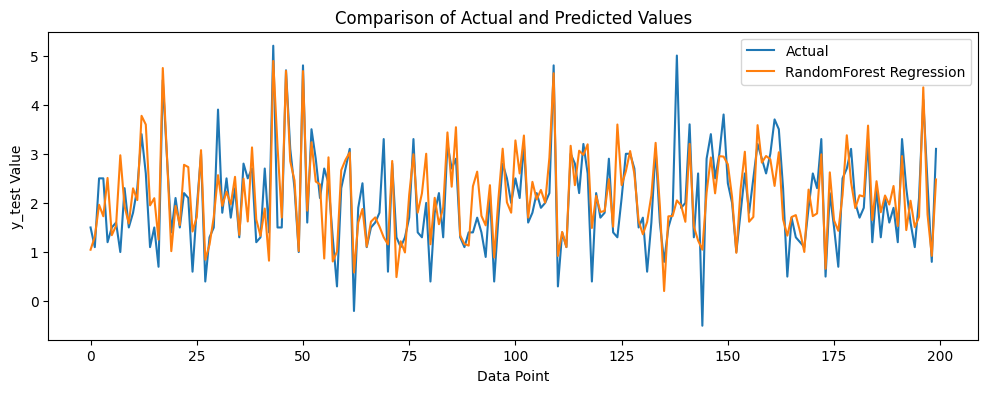

In [39]:
plt.figure(figsize=(12, 4))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from RandomForest Regression
sns.lineplot(x=range(200), y=y_rf_pred[:200], label='RandomForest Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.show()

### **Model Testing และ Evaluation RF**

In [12]:
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r2}")

Mean Absolute Error: 0.45433527332193224
Mean Squared Error: 0.3820573804470699
Root Mean Squared Error: 0.6181079035630186
R-squared: 0.661721789737624


### Use KNeighbors Regression to Prediction

In [31]:
knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [32]:
y_knn_pred = knn.predict(X_test)
y_knn_pred

array([[0.896],
       [1.444],
       [1.94 ],
       ...,
       [0.644],
       [1.576],
       [1.956]])

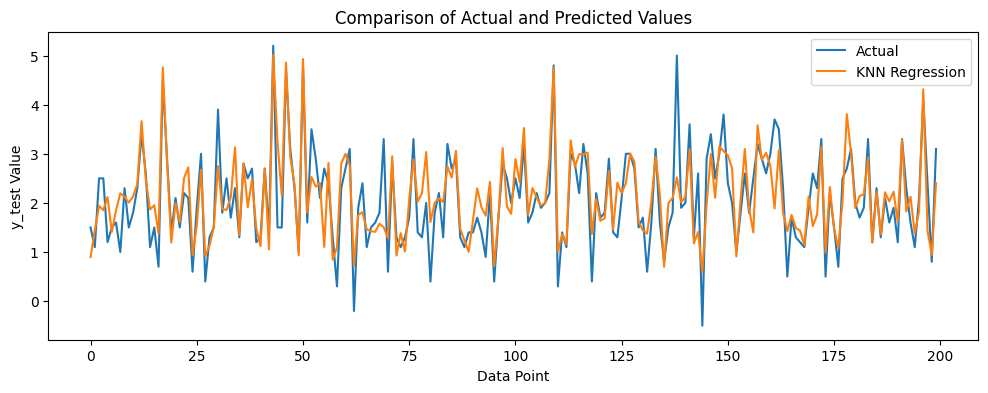

In [40]:
plt.figure(figsize=(12, 4))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from KNN
sns.lineplot(x=range(200), y=y_knn_pred[:200][:,0], label='KNN Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.show()

### **Model Testing และ Evaluation KNN**

In [15]:
knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_rmse = knn_mse ** 0.5
knn_r2 = r2_score(y_test, y_knn_pred)

print(f"Mean Absolute Error: {knn_mae}")
print(f"Mean Squared Error: {knn_mse}")
print(f"Root Mean Squared Error: {knn_rmse}")
print(f"R-squared: {knn_r2}")

Mean Absolute Error: 0.4424164192408676
Mean Squared Error: 0.3634790197609742
Root Mean Squared Error: 0.6028922123903859
R-squared: 0.6781712942469919


### **รวม**

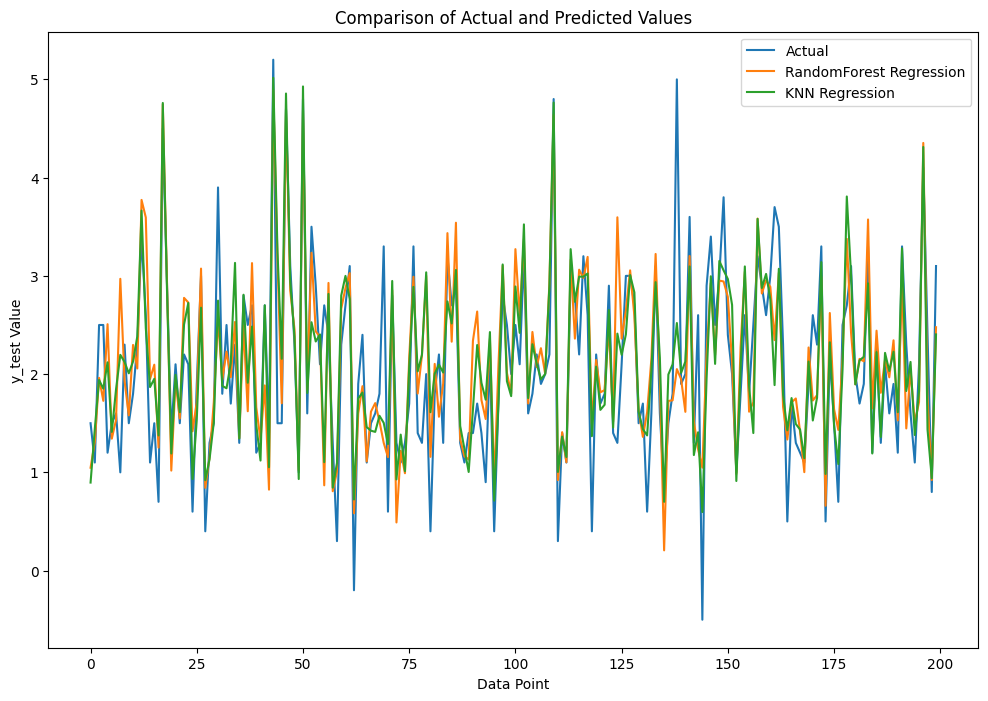

In [42]:
plt.figure(figsize=(12, 8))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from RandomForest Regression
sns.lineplot(x=range(200), y=y_rf_pred[:200], label='RandomForest Regression')

# Plot the predicted values from KNN Regression
sns.lineplot(x=range(200), y=y_knn_pred[:200][:,0], label='KNN Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.legend()  # Show legend
plt.show()


### **แสดงกราฟแท่งและเส้นเพื่อเปรียบเทียบประสิทธิภาพของ Random Forest Regression และ K-Nearest Neighbors Regression**

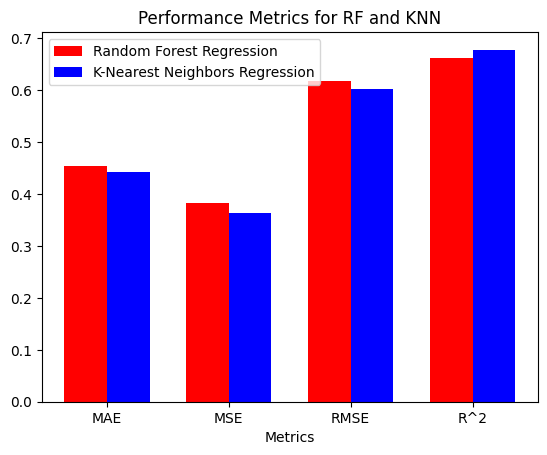

In [16]:
N = 4
ind = np.arange(N)
width = 0.35

rf_metrics = [rf_mae, rf_mse, rf_rmse, rf_r2]
kn_metrics = [knn_mae, knn_mse, knn_rmse, knn_r2]

fig, ax = plt.subplots()
rects1 = ax.bar(ind, rf_metrics, width, label='Random Forest Regression', color='r')
rects2 = ax.bar(ind + width, kn_metrics, width, label='K-Nearest Neighbors Regression', color='b')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics for RF and KNN')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['MAE', 'MSE', 'RMSE', 'R^2'])
ax.legend()

plt.show()

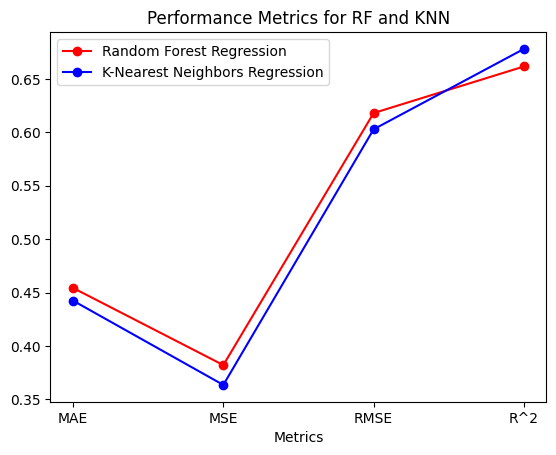

In [17]:
N = 4
ind = np.arange(N)
width = 0.35

rf_metrics = [rf_mae, rf_mse, rf_rmse, rf_r2]
knn_metrics = [knn_mae, knn_mse, knn_rmse, knn_r2]

fig, ax = plt.subplots()

ax.plot(ind, rf_metrics, label='Random Forest Regression', marker='o', linestyle='-', color='r')
ax.plot(ind, knn_metrics, label='K-Nearest Neighbors Regression', marker='o', linestyle='-', color='b')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics for RF and KNN')
ax.set_xticks(ind)
ax.set_xticklabels(['MAE', 'MSE', 'RMSE', 'R^2'])
ax.legend()

plt.show()

In [18]:
data = {'model': ['Random Forest Regression', 'K-Nearest Neighbors Regression'],
        'MAE': [rf_mae, knn_mae],
        'MSE': [rf_mse, knn_mse],
        'RMSE': [rf_rmse, knn_rmse],
        'R^2': [rf_r2, knn_r2]}

perfomance = pd.DataFrame(data)
perfomance

,model,MAE,MSE,RMSE,R^2
0,Random Forest Regression,0.454335,0.382057,0.618108,0.661722
1,K-Nearest Neighbors Regression,0.442416,0.363479,0.602892,0.678171
